In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_0 = pd.read_csv('data/kc_house_data.csv')

In [3]:
df = pd.read_csv("clean_df.csv")

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int64  
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  int64  
 11  sqft_basement  21420 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  zipcode        21420 non-null  int64  
 14  lat            21420 non-null  float64
 15  long           21420 non-null  float64
 16  sqft_living15  21420 non-null  int64  
 17  sqft_lot15     21420 non-null  int64  
 18  month 

In [6]:
df_0 = df
df_0.drop(columns=['id'],inplace=True, axis=1)

# Modeling

### Baseline: Model 0

The baseline model shows our initial accuracy of the model, and compare adjusted models to it.

In [7]:
from statsmodels.formula.api import ols

In [8]:
outcome = 'price'
predictors = df_0.drop('price', axis=1)
pred_variables = '+'.join(predictors.columns)
formula = outcome + '~' + pred_variables

In [9]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+sqft_basement+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15+month'

In [10]:
baseline_model = ols(formula = formula, data=df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2823.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:42:22   Log-Likelihood:            -2.9231e+05
No. Observations:               21420   AIC:                         5.846e+05
Df Residuals:                   21402   BIC:                         5.848e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.238e+05   2.97e+06      0.075      0.940   -5.59e+06    6.04e+06
bedrooms       -4.04e+04   1934.889    -20.878      0.000   -4.42e+04   -3.66e+04
bathrooms      4.658e+04   3302.961     14.101      0.000    4.01e+04    5.31e+04
sqft_living     119.2517     18.349      6.499      0.000      83.286     155.217
sqft_lot          0.1617      0.049      3.321      0.001       0.066       0.257
floors         1.091e+04   3661.844      2.979      0.003    3732.626    1.81e+04
waterfront     7.857e+05   1.72e+04     45.658      0.000    7.52e+05    8.19e+05
condition      2.623e+04   2369.822     11.068      0.000    2.16e+04    3.09e+04
grade          1.022e+05   2194.645     46.585      0.000    9.79e+04    1.07e+05
sqft_above       60.3419     18.338      3.291      0.001      24.398      96.286
sqft_basement    48.4372     18.187      2.663      0.008      12.789      84.085
yr_built      -2929.7937     69.907    -41.910      0.000   -3066.817   -2792.771
zipcode        -516.0531     33.523    -15.394      0.000    -581.761    -450.346
lat            5.745e+05   1.09e+04     52.754      0.000    5.53e+05    5.96e+05
long            -2.3e+05   1.34e+04    -17.173      0.000   -2.56e+05   -2.04e+05
sqft_living15    33.6555      3.467      9.706      0.000      26.859      40.452
sqft_lot15       -0.3658      0.075     -4.907      0.000      -0.512      -0.220
month         -3087.4732    449.726     -6.865      0.000   -3968.970   -2205.977
==============================================================================
Omnibus:                    18049.042   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1708454.791
Skew:                           3.534   Prob(JB):                         0.00
Kurtosis:                      46.177   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The baseline model shows an intercept of 223800 and an r-squared of 0.692.

In [11]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21420 non-null  float64
 1   bedrooms       21420 non-null  int64  
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  int64  
 4   sqft_lot       21420 non-null  int64  
 5   floors         21420 non-null  float64
 6   waterfront     21420 non-null  int64  
 7   condition      21420 non-null  int64  
 8   grade          21420 non-null  int64  
 9   sqft_above     21420 non-null  int64  
 10  sqft_basement  21420 non-null  float64
 11  yr_built       21420 non-null  int64  
 12  zipcode        21420 non-null  int64  
 13  lat            21420 non-null  float64
 14  long           21420 non-null  float64
 15  sqft_living15  21420 non-null  int64  
 16  sqft_lot15     21420 non-null  int64  
 17  month          21420 non-null  int64  
dtypes: flo

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
X = df_0.drop(columns=['price'], axis=1)
y= df['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [15]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17136 4284 17136 4284


In [16]:
baseline_linreg = LinearRegression()

In [17]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = baseline_linreg.predict(X_test)

In [19]:
residuals = y_pred - y_test

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

204669.4887810312

In [22]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

203277.18890082944

In [23]:
import statsmodels.api as sm
import scipy.stats as stats

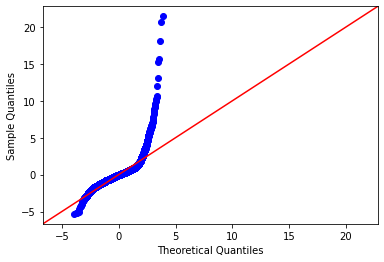

In [24]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Filtering Data: Model 1 

This model will be adjusted for outliers that can be extraneous info to accurately form a model. 

In [25]:
df_filter_0 = pd.read_csv('filter_df.csv')

In [26]:
df_filter = df_filter_0
df_filter.drop(columns=['Unnamed: 0', 'id'], inplace=True, axis=1)

Filtered columns:
 - Bedrooms less than or equal to 7
 - Bathrooms between 1 and 5
 - Squarefoot lot less than 25,0000
 - Squarefoot above basement less than 4,000
 - Squarefoot basement less than 1,500
 - Squarefoot lot of 15 nearest houses, less than 60,000
 - Floors less than or equal to 3
 - Grade between 4 and 11

In [27]:
outcome = 'price'
predictors = df_filter.drop('price', axis=1)
pred_variables = '+'.join(predictors.columns)
formula = outcome + '~' + pred_variables

In [28]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+grade+sqft_above+sqft_basement+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15+month'

In [29]:
model_1 = ols(formula = formula, data=df_filter).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2307.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:42:24   Log-Likelihood:            -2.6630e+05
No. Observations:               19885   AIC:                         5.326e+05
Df Residuals:                   19867   BIC:                         5.328e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.248e+06   2.39e+06     -1.775      0.076   -8.94e+06    4.43e+05
bedrooms      -2.294e+04   1701.630    -13.482      0.000   -2.63e+04   -1.96e+04
bathrooms      3.646e+04   2773.833     13.146      0.000     3.1e+04    4.19e+04
sqft_living      91.4966     15.575      5.875      0.000      60.969     122.025
sqft_lot          0.2092      0.120      1.741      0.082      -0.026       0.445
floors         2.949e+04   3052.939      9.659      0.000    2.35e+04    3.55e+04
waterfront     6.192e+05   1.68e+04     36.955      0.000    5.86e+05    6.52e+05
condition      3.034e+04   1905.289     15.922      0.000    2.66e+04    3.41e+04
grade          9.524e+04   1860.968     51.175      0.000    9.16e+04    9.89e+04
sqft_above       17.2010     15.541      1.107      0.268     -13.261      47.663
sqft_basement    22.3774     15.411      1.452      0.147      -7.829      52.584
yr_built      -2689.9859     56.383    -47.710      0.000   -2800.500   -2579.471
zipcode        -335.0925     26.909    -12.453      0.000    -387.837    -282.348
lat            5.577e+05   8757.898     63.683      0.000    5.41e+05    5.75e+05
long          -1.244e+05   1.11e+04    -11.195      0.000   -1.46e+05   -1.03e+05
sqft_living15    69.9093      3.043     22.974      0.000      63.945      75.874
sqft_lot15       -1.8228      0.224     -8.137      0.000      -2.262      -1.384
month         -3084.9726    361.723     -8.529      0.000   -3793.980   -2375.965
==============================================================================
Omnibus:                     9735.518   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128703.050
Skew:                           2.026   Prob(JB):                         0.00
Kurtosis:                      14.787   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept is -4248000, R-squared is 0.664. Even though accuracy of the model has decresed, removing outliers in the data will help make more logical conclusions about the final model. 

In [30]:
X = df_filter.drop(columns=['price'], axis=1)
y= df_filter['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [32]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [33]:
model_1_linreg = LinearRegression()

In [34]:
model_1_linreg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model_1_linreg.predict(X_test)

In [36]:
residuals = y_pred - y_test

In [37]:
mse_train = mean_squared_error(y_train, model_1_linreg.predict(X_train), squared=False)
mse_train

158514.96318526802

In [38]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

158462.3186946625

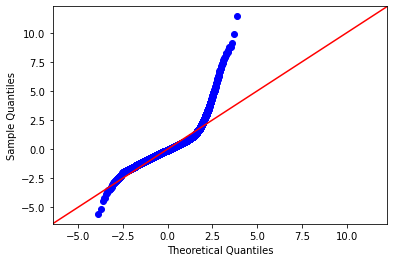

In [39]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

### Categorical Variables: Model 2 

For this model, taking into account the categorical variables. Each categorical variable is separated to represent a more detailed model for house attributes that affect the price. 

In [40]:
df_filter['bd_bin'] = pd.cut(df_filter.bedrooms, bins=[1,2,4,7])

In [41]:
#bedroom dummy
bedroom_dummies = pd.get_dummies(df_filter.bd_bin, prefix='bedrooms', drop_first=True)
bedroom_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   bedrooms_(2, 4]  19885 non-null  uint8
 1   bedrooms_(4, 7]  19885 non-null  uint8
dtypes: uint8(2)
memory usage: 39.0 KB


In [42]:
#bathroom dummie
df_filter['br_bin'] = pd.cut(df_filter.bathrooms, bins=[1,2,3,4,5])

In [43]:
bathroom_dummies = pd.get_dummies(df_filter.br_bin, prefix='bathrooms', drop_first=True)
bathroom_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   bathrooms_(2, 3]  19885 non-null  uint8
 1   bathrooms_(3, 4]  19885 non-null  uint8
 2   bathrooms_(4, 5]  19885 non-null  uint8
dtypes: uint8(3)
memory usage: 58.4 KB


In [44]:
df_filter['floor_bin'] = pd.cut(df_filter.floors, bins=[1,2,3])

In [45]:
floors_dummies = pd.get_dummies(df_filter.floor_bin, prefix='floors', drop_first=True)
floors_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   floors_(2, 3]  19885 non-null  uint8
dtypes: uint8(1)
memory usage: 19.5 KB


In [46]:
df_filter['grade_bin'] = pd.cut(df_filter.grade, bins=[1,5,7,11])

In [47]:
#grade dummies
grade_dummies = pd.get_dummies(df_filter.grade_bin, prefix='grade', drop_first=True)
grade_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   grade_(5, 7]   19885 non-null  uint8
 1   grade_(7, 11]  19885 non-null  uint8
dtypes: uint8(2)
memory usage: 39.0 KB


In [48]:
df_dummies = pd.concat([df_filter, bedroom_dummies,bathroom_dummies, grade_dummies, floors_dummies], axis=1)

In [49]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             19885 non-null  float64 
 1   bedrooms          19885 non-null  int64   
 2   bathrooms         19885 non-null  float64 
 3   sqft_living       19885 non-null  int64   
 4   sqft_lot          19885 non-null  int64   
 5   floors            19885 non-null  float64 
 6   waterfront        19885 non-null  int64   
 7   condition         19885 non-null  int64   
 8   grade             19885 non-null  int64   
 9   sqft_above        19885 non-null  int64   
 10  sqft_basement     19885 non-null  float64 
 11  yr_built          19885 non-null  int64   
 12  zipcode           19885 non-null  int64   
 13  lat               19885 non-null  float64 
 14  long              19885 non-null  float64 
 15  sqft_living15     19885 non-null  int64   
 16  sqft_lot15        1988

In [50]:
df_dummies.drop(columns=['bedrooms', 'bd_bin', 'bathrooms','br_bin', 'grade', 'grade_bin' , 'floors', 'floor_bin'],inplace=True,axis=1)

In [51]:
df_dummies.columns

Index(['price', 'sqft_living', 'sqft_lot', 'waterfront', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'bedrooms_(2, 4]',
       'bedrooms_(4, 7]', 'bathrooms_(2, 3]', 'bathrooms_(3, 4]',
       'bathrooms_(4, 5]', 'grade_(5, 7]', 'grade_(7, 11]', 'floors_(2, 3]'],
      dtype='object')

In [52]:
df_dummies.columns = [
       'price', 'sqft_living', 'sqft_lot', 'waterfront', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'bedrooms_2_4',
       'bedrooms_4_6', 'bathrooms_2_3', 'bathrooms_3_4',
       'bathrooms_4_5', 'grade_5_7', 'grade_7_11', 'floors_2_3'
]

In [53]:
outcome = 'price'
predictors = df_dummies.drop('price', axis=1)
pred_variables = '+'.join(predictors.columns)
formula = outcome + '~' + pred_variables

In [54]:
baseline_model = ols(formula = formula, data=df_dummies).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1658.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:42:24   Log-Likelihood:            -2.6707e+05
No. Observations:               19885   AIC:                         5.342e+05
Df Residuals:                   19863   BIC:                         5.344e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.305e+06   2.49e+06     -3.335      0.001   -1.32e+07   -3.42e+06
sqft_living     104.4045     16.086      6.491      0.000      72.875     135.934
sqft_lot          0.1415      0.125      1.132      0.258      -0.104       0.386
waterfront     6.343e+05   1.74e+04     36.416      0.000       6e+05    6.68e+05
condition      3.202e+04   1980.158     16.172      0.000    2.81e+04    3.59e+04
sqft_above       44.7884     16.056      2.789      0.005      13.317      76.260
sqft_basement    20.1688     16.025      1.259      0.208     -11.242      51.579
yr_built      -2079.7859     57.165    -36.382      0.000   -2191.835   -1967.737
zipcode        -363.1087     27.947    -12.993      0.000    -417.886    -308.331
lat            5.981e+05   9093.686     65.775      0.000     5.8e+05    6.16e+05
long          -1.589e+05   1.16e+04    -13.718      0.000   -1.82e+05   -1.36e+05
sqft_living15    98.8753      3.117     31.721      0.000      92.766     104.985
sqft_lot15       -1.8462      0.231     -7.994      0.000      -2.299      -1.394
month         -2897.6127    375.993     -7.707      0.000   -3634.590   -2160.636
bedrooms_2_4  -2.675e+04   3810.065     -7.022      0.000   -3.42e+04   -1.93e+04
bedrooms_4_6  -6.318e+04   6065.208    -10.416      0.000   -7.51e+04   -5.13e+04
bathrooms_2_3  1.215e+04   3393.957      3.581      0.000    5502.171    1.88e+04
bathrooms_3_4  1.368e+05   6473.130     21.138      0.000    1.24e+05     1.5e+05
bathrooms_4_5  2.223e+05   1.95e+04     11.384      0.000    1.84e+05    2.61e+05
grade_5_7      5.734e+04   1.15e+04      4.995      0.000    3.48e+04    7.98e+04
grade_7_11     1.514e+05    1.2e+04     12.671      0.000    1.28e+05    1.75e+05
floors_2_3     8.247e+04   6791.794     12.143      0.000    6.92e+04    9.58e+04
==============================================================================
Omnibus:                     8970.139   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103552.887
Skew:                           1.864   Prob(JB):                         0.00
Kurtosis:                      13.540   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept is at -8305000, and r-squared is .637. Though the accruacy for the model has decresed, this maybe due to each category being closely coorrelated. The model shows how each category effect the price increasing or decreasing the value of the house. An increase in bedrooms lead to a decrease in value while more bathrooms, a higher grade, and additional floors show an increase in value.  

In [55]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19885 non-null  float64
 1   sqft_living    19885 non-null  int64  
 2   sqft_lot       19885 non-null  int64  
 3   waterfront     19885 non-null  int64  
 4   condition      19885 non-null  int64  
 5   sqft_above     19885 non-null  int64  
 6   sqft_basement  19885 non-null  float64
 7   yr_built       19885 non-null  int64  
 8   zipcode        19885 non-null  int64  
 9   lat            19885 non-null  float64
 10  long           19885 non-null  float64
 11  sqft_living15  19885 non-null  int64  
 12  sqft_lot15     19885 non-null  int64  
 13  month          19885 non-null  int64  
 14  bedrooms_2_4   19885 non-null  uint8  
 15  bedrooms_4_6   19885 non-null  uint8  
 16  bathrooms_2_3  19885 non-null  uint8  
 17  bathrooms_3_4  19885 non-null  uint8  
 18  bathro

In [56]:
X = df_dummies.drop(columns=['price'], axis=1)
y= df_dummies['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [58]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [59]:
baseline_linreg = LinearRegression()

In [60]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = baseline_linreg.predict(X_test)

In [62]:
residuals = y_pred - y_test

In [63]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

164078.61738130273

In [64]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

167248.18045616566

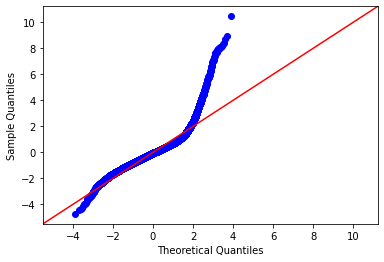

In [65]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Geographic Sectors :Model 3

This model will separate the map into geographic sectors to show a difference in price depending on location. 

In [66]:
df_geographic_sectors = df_dummies
df_geographic_sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19885 non-null  float64
 1   sqft_living    19885 non-null  int64  
 2   sqft_lot       19885 non-null  int64  
 3   waterfront     19885 non-null  int64  
 4   condition      19885 non-null  int64  
 5   sqft_above     19885 non-null  int64  
 6   sqft_basement  19885 non-null  float64
 7   yr_built       19885 non-null  int64  
 8   zipcode        19885 non-null  int64  
 9   lat            19885 non-null  float64
 10  long           19885 non-null  float64
 11  sqft_living15  19885 non-null  int64  
 12  sqft_lot15     19885 non-null  int64  
 13  month          19885 non-null  int64  
 14  bedrooms_2_4   19885 non-null  uint8  
 15  bedrooms_4_6   19885 non-null  uint8  
 16  bathrooms_2_3  19885 non-null  uint8  
 17  bathrooms_3_4  19885 non-null  uint8  
 18  bathro

In [67]:
df_geographic_sectors.loc[(df_geographic_sectors.lat > 47.69) & (df_geographic_sectors.long <= -122.28), "sector_1"] = 1

In [68]:
df_geographic_sectors.sector_1.value_counts()

1.0    2001
Name: sector_1, dtype: int64

In [69]:
df_geographic_sectors.loc[(df_geographic_sectors.lat > 47.68) & (df_geographic_sectors.long > -122.28), "sector_2"] = 2

In [70]:
df_geographic_sectors.sector_2.value_counts()

2.0    2402
Name: sector_2, dtype: int64

In [71]:
df_geographic_sectors.loc[(df_geographic_sectors.lat <= 47.69) & (df_geographic_sectors.lat > 47.64) & (df_geographic_sectors.long <= -122.2), "sector_3"] = 3

In [72]:
df_geographic_sectors.sector_3.value_counts()

3.0    2141
Name: sector_3, dtype: int64

In [73]:
df_geographic_sectors.loc[(df_geographic_sectors.lat <= 47.64) & (df_geographic_sectors.lat > 47.55) & (df_geographic_sectors.long < -122.2), "sector_4"] = 4

In [74]:
df_geographic_sectors.sector_4.value_counts()

4.0    2260
Name: sector_4, dtype: int64

In [75]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.68) & (df_geographic_sectors.lat >= 47.55) & (df_geographic_sectors.long >= -122.2), "sector_5"] = 5

In [76]:
df_dummies.sector_5.value_counts()

5.0    2518
Name: sector_5, dtype: int64

In [77]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.55) & (df_geographic_sectors.lat >= 47.45) & (df_geographic_sectors.long < -122.2), "sector_6"] = 6

In [78]:
df_dummies.sector_6.value_counts()

6.0    2277
Name: sector_6, dtype: int64

In [79]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.55) & (df_geographic_sectors.lat > 47.45) & (df_geographic_sectors.long >= -122.2), "sector_7"] = 7

In [80]:
df_dummies.sector_7.value_counts()

7.0    1905
Name: sector_7, dtype: int64

In [81]:
df_geographic_sectors.loc[(df_geographic_sectors.lat < 47.45) & (df_geographic_sectors.long < -122.2), "sector_8"] = 8

In [82]:
df_geographic_sectors.sector_8.value_counts()

8.0    2144
Name: sector_8, dtype: int64

In [83]:
df_geographic_sectors.loc[(df_geographic_sectors.lat <= 47.45) & (df_geographic_sectors.long >= -122.2), "sector_9"] = 9

In [84]:
df_geographic_sectors.sector_9.value_counts()

9.0    2293
Name: sector_9, dtype: int64

In [85]:
df_geographic_sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19885 entries, 0 to 19884
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19885 non-null  float64
 1   sqft_living    19885 non-null  int64  
 2   sqft_lot       19885 non-null  int64  
 3   waterfront     19885 non-null  int64  
 4   condition      19885 non-null  int64  
 5   sqft_above     19885 non-null  int64  
 6   sqft_basement  19885 non-null  float64
 7   yr_built       19885 non-null  int64  
 8   zipcode        19885 non-null  int64  
 9   lat            19885 non-null  float64
 10  long           19885 non-null  float64
 11  sqft_living15  19885 non-null  int64  
 12  sqft_lot15     19885 non-null  int64  
 13  month          19885 non-null  int64  
 14  bedrooms_2_4   19885 non-null  uint8  
 15  bedrooms_4_6   19885 non-null  uint8  
 16  bathrooms_2_3  19885 non-null  uint8  
 17  bathrooms_3_4  19885 non-null  uint8  
 18  bathro

In [86]:
df_geographic_sectors.sector_1.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_1.isna().sum()

0

In [87]:
df_geographic_sectors.sector_2.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_2.isna().sum()

0

In [88]:
df_geographic_sectors.sector_3.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_3.isna().sum()

0

In [89]:
df_geographic_sectors.sector_4.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_4.isna().sum()

0

In [90]:
df_geographic_sectors.sector_5.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_5.isna().sum()

0

In [91]:
df_geographic_sectors.sector_6.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_6.isna().sum()

0

In [92]:
df_geographic_sectors.sector_7.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_7.isna().sum()

0

In [93]:
df_geographic_sectors.sector_8.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_8.isna().sum()

0

In [94]:
df_geographic_sectors.sector_9.fillna(value=0, axis=0, inplace=True)
df_geographic_sectors.sector_9.isna().sum()

0

In [95]:
df_geographic_sectors['sec'] = df_geographic_sectors.iloc[:,22:31].sum(axis=1)

In [96]:
df_geographic_sectors.sec.value_counts()

5.0    2580
2.0    2340
9.0    2293
6.0    2277
4.0    2260
8.0    2144
3.0    2079
1.0    2001
7.0    1905
0.0       6
Name: sec, dtype: int64

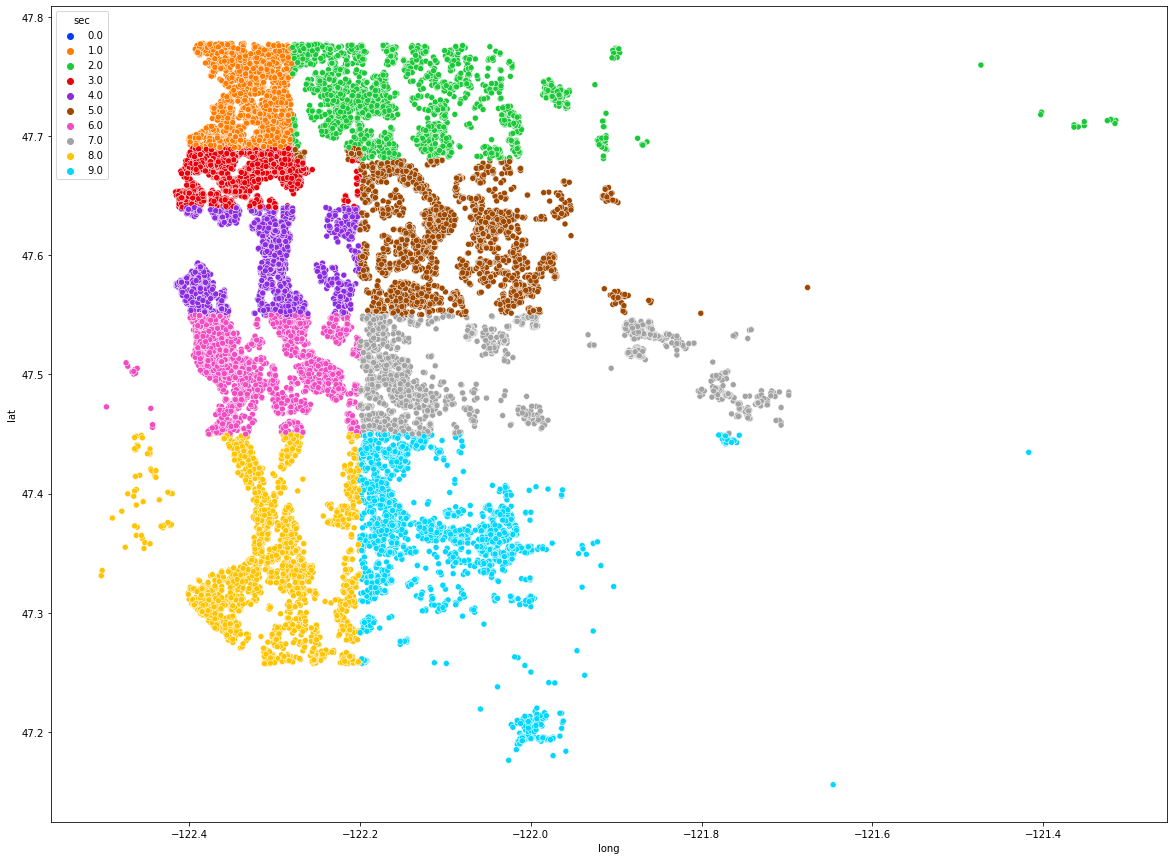

In [97]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue='sec',  data =df_geographic_sectors , palette='bright');

In [98]:
df_geographic_sectors.drop(columns=['sec'], axis=1, inplace=True)

In [99]:
outcome = 'price'
predictors = df_geographic_sectors.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [100]:
model_3 = ols(formula = formula, data = df_geographic_sectors).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1727.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:42:26   Log-Likelihood:            -2.6438e+05
No. Observations:               19885   AIC:                         5.288e+05
Df Residuals:                   19854   BIC:                         5.291e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.208e+07   3.21e+06     13.094      0.000    3.58e+07    4.84e+07
sqft_living      97.7728     14.054      6.957      0.000      70.225     125.320
sqft_lot          0.4078      0.109      3.731      0.000       0.194       0.622
waterfront     6.734e+05   1.52e+04     44.177      0.000    6.44e+05    7.03e+05
condition      3.604e+04   1742.351     20.688      0.000    3.26e+04    3.95e+04
sqft_above       57.1626     14.030      4.074      0.000      29.663      84.662
sqft_basement    13.8343     14.002      0.988      0.323     -13.610      41.279
yr_built       -705.8888     53.254    -13.255      0.000    -810.271    -601.507
zipcode        -743.3368     29.614    -25.101      0.000    -801.383    -685.290
lat            5.571e+05   2.89e+04     19.245      0.000       5e+05    6.14e+05
long          -4.396e+04   1.37e+04     -3.207      0.001   -7.08e+04   -1.71e+04
sqft_living15    92.4220      2.739     33.742      0.000      87.053      97.791
sqft_lot15        0.2065      0.204      1.011      0.312      -0.194       0.607
month         -2785.1697    328.477     -8.479      0.000   -3429.012   -2141.328
bedrooms_2_4  -8013.0071   3344.692     -2.396      0.017   -1.46e+04   -1457.132
bedrooms_4_6  -4.454e+04   5311.192     -8.386      0.000   -5.49e+04   -3.41e+04
bathrooms_2_3   317.1579   2973.771      0.107      0.915   -5511.682    6145.998
bathrooms_3_4  8.775e+04   5694.759     15.408      0.000    7.66e+04    9.89e+04
bathrooms_4_5  1.728e+05   1.71e+04     10.116      0.000    1.39e+05    2.06e+05
grade_5_7      8709.1672   1.01e+04      0.865      0.387    -1.1e+04    2.85e+04
grade_7_11     6.616e+04   1.05e+04      6.289      0.000    4.55e+04    8.68e+04
floors_2_3     1.663e+04   6055.229      2.746      0.006    4761.001    2.85e+04
sector_1       1.983e+05   1.83e+04     10.865      0.000    1.63e+05    2.34e+05
sector_2       5.363e+04   8965.638      5.982      0.000    3.61e+04    7.12e+04
sector_3       1.309e+05   5931.359     22.073      0.000    1.19e+05    1.43e+05
sector_4       1.055e+05   4625.051     22.817      0.000    9.65e+04    1.15e+05
sector_5       4.582e+04   3706.385     12.363      0.000    3.86e+04    5.31e+04
sector_6       4.172e+04   3177.214     13.131      0.000    3.55e+04    4.79e+04
sector_7       2.243e+04   2740.975      8.184      0.000    1.71e+04    2.78e+04
sector_8       1.885e+04   2602.386      7.242      0.000    1.37e+04    2.39e+04
sector_9       1.657e+04   2287.335      7.246      0.000    1.21e+04    2.11e+04
==============================================================================
Omnibus:                    10306.628   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172609.198
Skew:                           2.103   Prob(JB):         

The intercept is 44,550,000, and r-squared .723. Here can see the price effects between each sector. Sector 4 shows the largest increase while sector 2 shows a decrease in price. 

In [101]:
X = df_geographic_sectors.drop(columns=['price'], axis=1)
y= df_geographic_sectors['price']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [103]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [104]:
baseline_linreg = LinearRegression()

In [105]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = baseline_linreg.predict(X_test)

In [107]:
residuals = y_pred - y_test

In [108]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

143327.91869175847

In [109]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

146052.15178566106

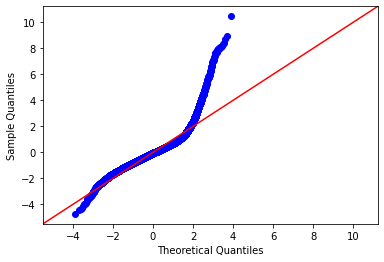

In [110]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Multicollinearity: Model 4

This model will adjust for multicollinearity in order to account for high p-values.

In [111]:
#df_multico = df_geographic_sectors.drop(columns=['price'])
df_multico = df_geographic_sectors

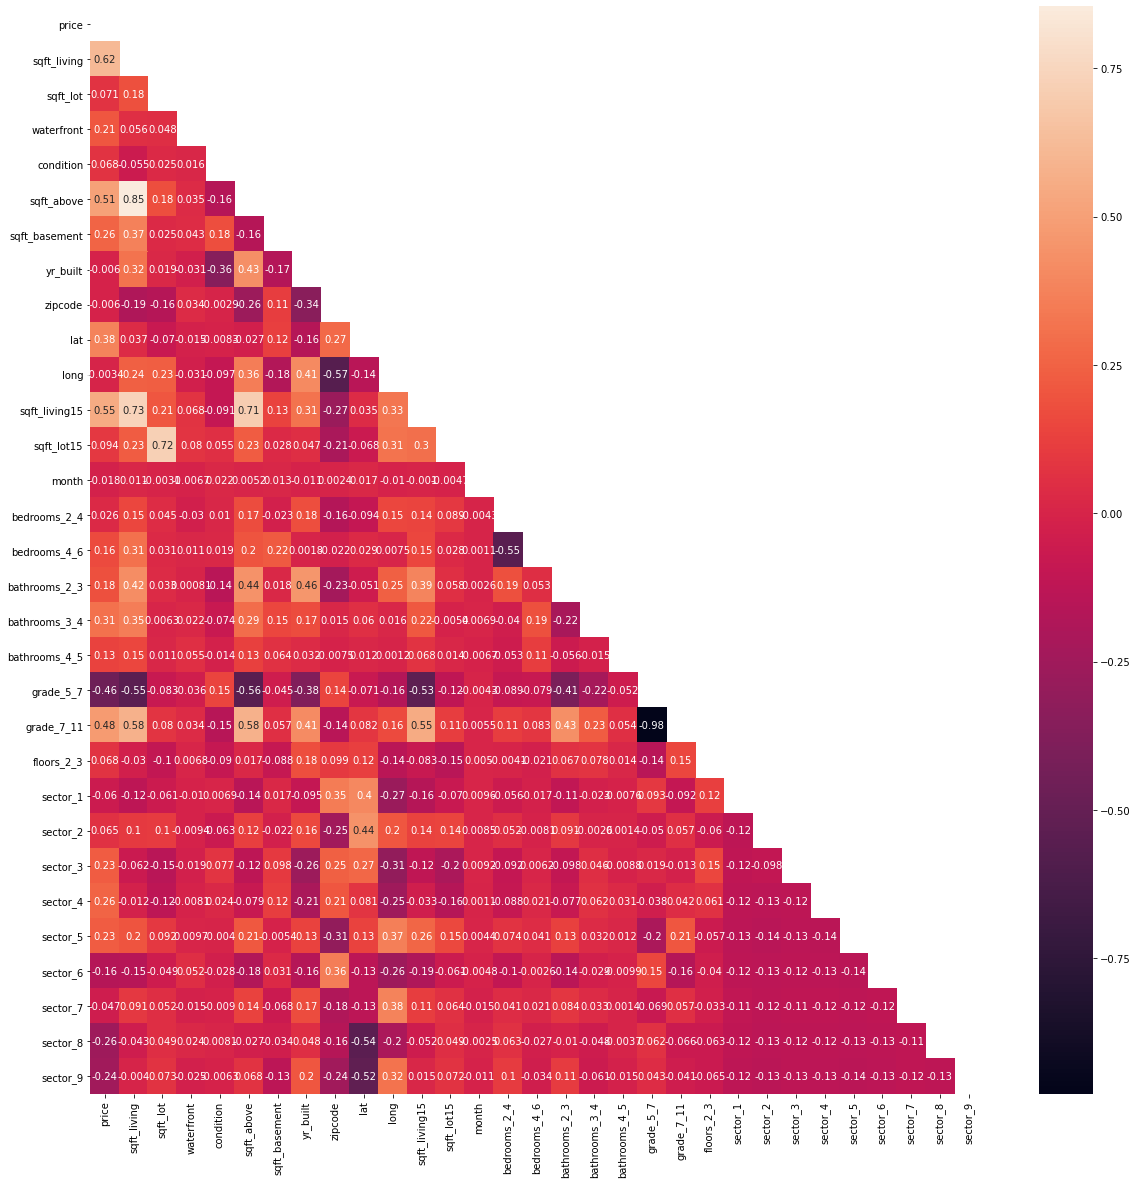

In [112]:
corr = df_multico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, annot = True);

In [113]:
df_multico.drop(columns=[
    'zipcode', 'lat', 'long', 'sqft_lot15', 'bathrooms_2_3', 'grade_5_7', 'sqft_basement', 'bedrooms_2_4', 'sector_8', 'sector_9'], 
                axis=1, 
                inplace=True
               )

In [114]:
outcome = 'price'
predictors = df_multico.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [115]:
model_4 = ols(formula = formula, data = df_multico).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2445.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:            -2.6479e+05
No. Observations:               19885   AIC:                         5.296e+05
Df Residuals:                   19864   BIC:                         5.298e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.127e+06   1.01e+05     11.183      0.000     9.3e+05    1.32e+06
sqft_living     109.0514      3.197     34.115      0.000     102.786     115.317
sqft_lot          0.4206      0.082      5.149      0.000       0.260       0.581
waterfront     6.613e+05   1.55e+04     42.679      0.000    6.31e+05    6.92e+05
condition      3.761e+04   1760.282     21.367      0.000    3.42e+04    4.11e+04
sqft_above       41.4145      3.200     12.942      0.000      35.142      47.687
yr_built       -721.7516     50.051    -14.420      0.000    -819.856    -623.647
sqft_living15    97.8755      2.759     35.479      0.000      92.468     103.283
month         -2743.6369    335.267     -8.183      0.000   -3400.788   -2086.486
bedrooms_4_6  -3.203e+04   4197.680     -7.630      0.000   -4.03e+04   -2.38e+04
bathrooms_3_4  8.569e+04   4940.974     17.343      0.000     7.6e+04    9.54e+04
bathrooms_4_5  1.806e+05   1.71e+04     10.590      0.000    1.47e+05    2.14e+05
grade_7_11     5.948e+04   2879.701     20.655      0.000    5.38e+04    6.51e+04
floors_2_3     2.325e+04   6153.751      3.778      0.000    1.12e+04    3.53e+04
sector_1       1.982e+05   4187.266     47.331      0.000     1.9e+05    2.06e+05
sector_2       8.376e+04   1861.109     45.004      0.000    8.01e+04    8.74e+04
sector_3       1.239e+05   1470.446     84.260      0.000    1.21e+05    1.27e+05
sector_4       9.097e+04   1063.403     85.548      0.000    8.89e+04    9.31e+04
sector_5       4.507e+04    759.087     59.372      0.000    4.36e+04    4.66e+04
sector_6       2.207e+04    669.046     32.985      0.000    2.08e+04    2.34e+04
sector_7       1.216e+04    578.901     21.012      0.000     1.1e+04    1.33e+04
==============================================================================
Omnibus:                    10471.942   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172930.673
Skew:                           2.154   Prob(JB):                         0.00
Kurtosis:                      16.790   Cond. No.                     1.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model shows an intercept of 1,127,000 and r-squared .711. Removing unnecessary and multi-colinear variables takes away from the models ability to generalize for all the houses. Although, without unnecessary and multi-colinear variables, the model has less interference between each variable, increasing variables independence to make a more sound model for predicting price. 

In [116]:
X = df_geographic_sectors.drop(columns=['price'], axis=1)
y= df_geographic_sectors['price']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, test_size=.20)

In [118]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15908 3977 15908 3977


In [119]:
baseline_linreg = LinearRegression()

In [120]:
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred = baseline_linreg.predict(X_test)

In [122]:
residuals = y_pred - y_test

In [123]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train), squared=False)
mse_train

146411.16060896812

In [124]:
mse_test = mean_squared_error(y_test, y_pred, squared=False)
mse_test

148890.9667721295

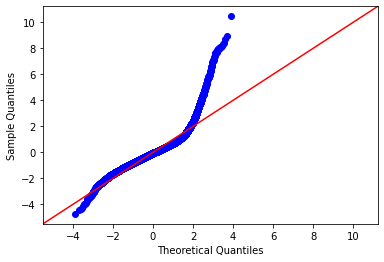

In [125]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)